In [1]:
import numpy as np
import scipy.constants as const
import matplotlib.pyplot as plt
from tqdm import tqdm
              
import warnings
warnings.filterwarnings("ignore")

In [2]:
dc_tm = lambda splitratio: [[np.sqrt(1-splitratio), 1j*np.sqrt(splitratio)], [1j*np.sqrt(splitratio), np.sqrt(1-splitratio)]]
ps_tm = lambda phase: [[np.exp(-1j*phase/2), 0], [0, np.exp(1j*phase/2)]]
psr_tm = lambda delay, wavelength: [[np.exp(1j*2*np.pi/wavelength * delay * const.c), 0], [0, 1]]

In [3]:
dvd_delay = 0.5e-12

no_wavelength = 401
no_theta = 11
no_splitratio = 1
no_pol_frac = 1

In [4]:
wavelength = np.linspace(1.31, 1.33, num=no_wavelength) * 1e-6

In [5]:
theta = np.linspace(0, np.pi, num=no_theta)
splitratio = np.linspace(0.5, 0.5, num=no_splitratio)
pol_frac = np.linspace(0.5, 0.5, num=no_pol_frac)

In [6]:
pol_frac_sweep = np.zeros((1, 1, 1, 1, len(pol_frac), 2, 1), dtype=complex)
for idd_pol, pol_val in tqdm(enumerate(pol_frac), total=len(pol_frac), desc='Polarization Fraction Sweep'):
              pol_frac_sweep[0, 0, 0, 0, idd_pol, :, :] = np.array([[pol_val],[1-pol_val]])/np.sqrt(pol_val**2 + (1-pol_val)**2)

dc1_sr_sweep = np.zeros((1, 1, len(splitratio), 1, 1, 2, 2), dtype=complex)
for idd_sr, sr_val in tqdm(enumerate(splitratio), total=len(splitratio), desc='Split Ratio Sweep for DC1'):
              dc1_sr_sweep[0, 0, idd_sr, 0, 0, :, :] = dc_tm(sr_val)
              
dc2_sr_sweep = np.zeros((1, 1, 1, len(splitratio), 1, 2, 2), dtype=complex)
for idd_sr, sr_val in tqdm(enumerate(splitratio), total=len(splitratio), desc='Split Ratio Sweep for DC2'):
              dc2_sr_sweep[0, 0, 0, idd_sr, 0, :, :] = dc_tm(sr_val)
              
ps_theta_sweep = np.zeros((1, len(theta),1, 1, 1, 2, 2), dtype=complex)
for idd_theta, theta_val in tqdm(enumerate(theta), total=len(theta), desc='Theta Sweep'):
              ps_theta_sweep[0, idd_theta, 0, 0, 0, :, :] = ps_tm(theta_val)
              
psr_wave_sweep = np.zeros(( len(wavelength), 1, 1, 1, 1, 2, 2), dtype=complex)
for idd_wave, wave_val in tqdm(enumerate(wavelength), total=len(wavelength), desc='Wavelength Sweep'):
              psr_wave_sweep[idd_wave, 0, 0, 0, 0, :, :] = psr_tm(dvd_delay, wave_val)

Wavelength Sweep: 100%|██████████| 401/401 [00:00<00:00, 407934.98it/s]


In [7]:
single_stage_tunable_psrc = dc2_sr_sweep @ ps_theta_sweep @ dc1_sr_sweep @ psr_wave_sweep @ pol_frac_sweep

In [8]:
single_stage_tunable_psrc.shape

(401, 11, 1, 1, 1, 2, 1)

Theta Sweep: 100%|██████████| 11/11 [00:00<00:00, 3462.21it/s]


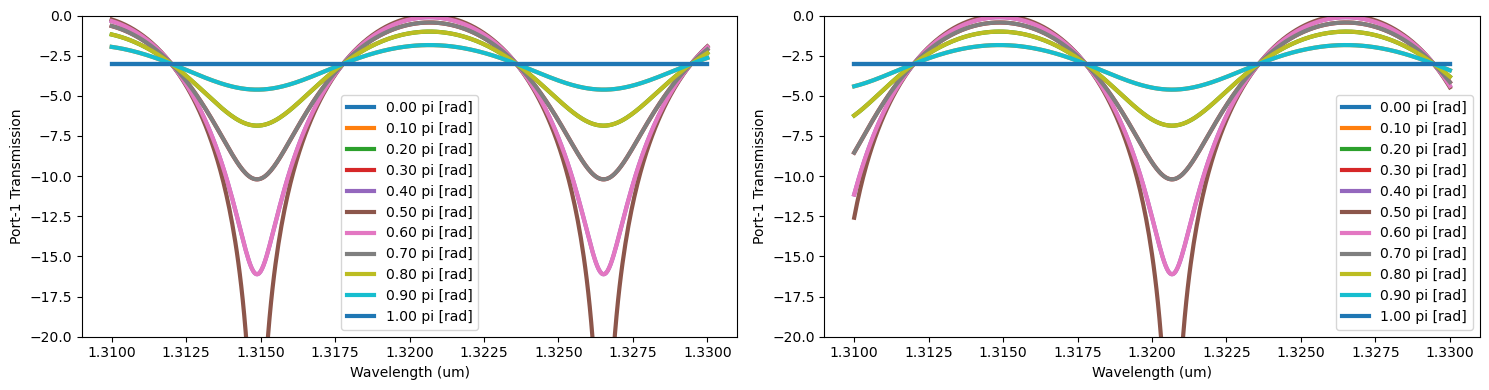

In [22]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
for idd_theta, theta_val in tqdm(enumerate(theta), total=len(theta), desc='Theta Sweep'):
              plt.plot(wavelength*1e6, 10*np.log10(np.abs(single_stage_tunable_psrc[:, idd_theta, 0, 0, 0, 0, 0])**2), linewidth=3.0, label=f'{theta_val/np.pi:.2f} pi [rad]')
plt.ylim(-20,0)
plt.xlabel('Wavelength (um)')
plt.ylabel('Port-1 Transmission (dB)')
plt.legend()
plt.subplot(122)
for idd_theta, theta_val in tqdm(enumerate(theta), total=len(theta), desc='Theta Sweep'):
              plt.plot(wavelength*1e6, 10*np.log10(np.abs(single_stage_tunable_psrc[:, idd_theta, 0, 0, 0, 1, 0])**2), linewidth=3.0, label=f'{theta_val/np.pi:.2f} pi [rad]')
plt.ylim(-20,0)
plt.xlabel('Wavelength (um)')
plt.ylabel('Port-1 Transmission (dB)')
plt.legend()
plt.tight_layout()